# Task 1: Data Exploration and Processing

## Part 1: Explore your specific dataset
by calculating basic statistics number of samples and number of samples per class: is your dataset balanced? min / avg / max length of text reading through 100+ samples: noteworthy style, vocabulary, idioms.

### Imports

In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_class_distribution



c:\Users\Esther\anaconda3\envs\nlp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Data

In [2]:
def load_medical_dataset(dataset_name="argilla/medical-domain", split='train'):
    """
    Loads the dataset

    Parameters:
        dataset_name (string): Defaults to medical-domain dataset from Hugging Face*

    Returns:
        DataFrame
    """
    try:
        # Load the dataset
        dataset = load_dataset(dataset_name, split=split)
        print("Dataset loaded successfully!")
        df = pd.DataFrame(dataset)
        
        return df
    
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None
    

In [3]:
df = load_medical_dataset()


Dataset loaded successfully!
Available splits: ['train']


### Data Visualization/Analysis

**Basic statistics**

In [86]:
def extract_labels_and_text_length(df):
    def extract_values(dictionary, key):
        '''
        Extract values from dicts within prediction and metrics columns
        '''
        if type(dictionary) != dict:
            dictionary = dictionary[0]
        return dictionary[key]

    # Extract labels from prediction col
    df['label'] = df['prediction'].apply(lambda x: pd.Series(extract_values(x, 'label')))

    # Extract text_length from metrics col
    df['text_length'] = df['metrics'].apply(lambda x: pd.Series(extract_values(x, 'text_length')))

    return df

def analyze_dataset_statistics(df):
    """
    Analyze the length of text and distribution of samples across different classes in the dataset

    Parameters
        dataset: dict(pd.DataFrame)

    Returns
        class_counts: dict(pd.Series), key=split_name, value=(pd.Series, index=label and value=class_count)
    """
        # Display number of samples
    print(f"Number of samples: {len(df)}")
    print(f"\tFeatures: {df.columns}")

    df = extract_labels_and_text_length(df) # with additional features now (label and text_length)
    
    # Calculate Min, Avg, Max length of text
    min_length = df['text_length'].min()
    avg_length = df['text_length'].mean()
    max_length = df['text_length'].max()
    print(f"\tText length:\n\t\tMin: {min_length}\n\t\tAvg: {avg_length:.2f}\n\t\tMax: {max_length}")
    
    print("\nAnalyzing class distribution:")

    # Count samples per class
    
    class_counts = (df.groupby(['label']).size()).sort_values(ascending=False)
    
    # Display results
    for label, class_count in class_counts.items():
        print(f"{label}: {class_count} samples ({100*class_count/len(df):.2f}%)")
    return class_counts


In [87]:
class_distribution = analyze_dataset_statistics(df)

Number of samples: 4966
	Features: Index(['text', 'inputs', 'prediction', 'prediction_agent', 'annotation',
       'annotation_agent', 'multi_label', 'explanation', 'id', 'metadata',
       'status', 'event_timestamp', 'metrics'],
      dtype='object')
	Text length:
		Min: 11
		Avg: 3052.31
		Max: 18425

Analyzing class distribution:
 Surgery: 1088 samples (21.91%)
 Consult - History and Phy.: 516 samples (10.39%)
 Cardiovascular / Pulmonary: 371 samples (7.47%)
 Orthopedic: 355 samples (7.15%)
 Radiology: 273 samples (5.50%)
 General Medicine: 259 samples (5.22%)
 Gastroenterology: 224 samples (4.51%)
 Neurology: 223 samples (4.49%)
 SOAP / Chart / Progress Notes: 166 samples (3.34%)
 Urology: 156 samples (3.14%)
 Obstetrics / Gynecology: 155 samples (3.12%)
 Discharge Summary: 108 samples (2.17%)
 ENT - Otolaryngology: 96 samples (1.93%)
 Neurosurgery: 94 samples (1.89%)
 Hematology - Oncology: 90 samples (1.81%)
 Ophthalmology: 83 samples (1.67%)
 Nephrology: 81 samples (1.63%)
 Eme

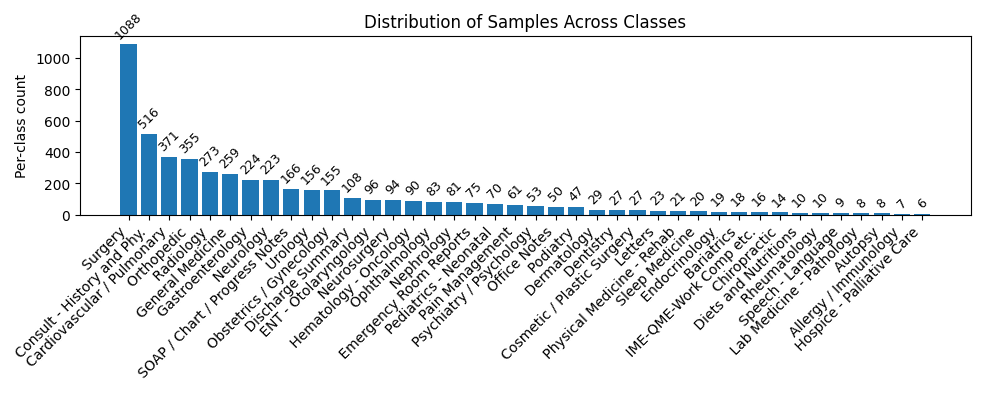

In [88]:
x = range(len(class_distribution))
plt.figure(figsize=(10,4))
plt.bar(x, height=class_distribution.values)
plt.ylabel("Per-class count")
plt.xticks(x, class_distribution.index, rotation=45, ha='right')

for i, value in enumerate(class_distribution.values):
    plt.text(i, value + 0.02 * max(class_distribution.values), str(value), 
                ha='center', va='bottom', fontsize=9, rotation=45)
plt.title(f"Distribution of Samples Across Classes")
plt.tight_layout()
plt.show()

### [Comments on dataset]

Dataset is not balanced, both in terms of text length and class sizes.

In [89]:
# Load into a DataFrame for easier handling
new_df = pd.DataFrame({
    "text": df['text'],
    "label": df['label']
})
print(new_df.head(10))
df = new_df


[[{'label': ' Gastroenterology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' Radiology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' SOAP / Chart / Progress Notes', 'score': 1.0}],
 [{'label': ' Letters', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' Radiology', 'score': 1.0}],
 [{'label': ' Lab Medicine - Pathology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}]]

In [6]:
### Display a few samples per class

['Gastroenterology',
 'Surgery',
 'Radiology',
 'Surgery',
 'SOAP / Chart / Progress Notes',
 'Letters',
 'Surgery',
 'Radiology',
 'Lab Medicine - Pathology',
 'Surgery']

Total samples: 4966
Unique labels: 40

Samples per class:
label
Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surge

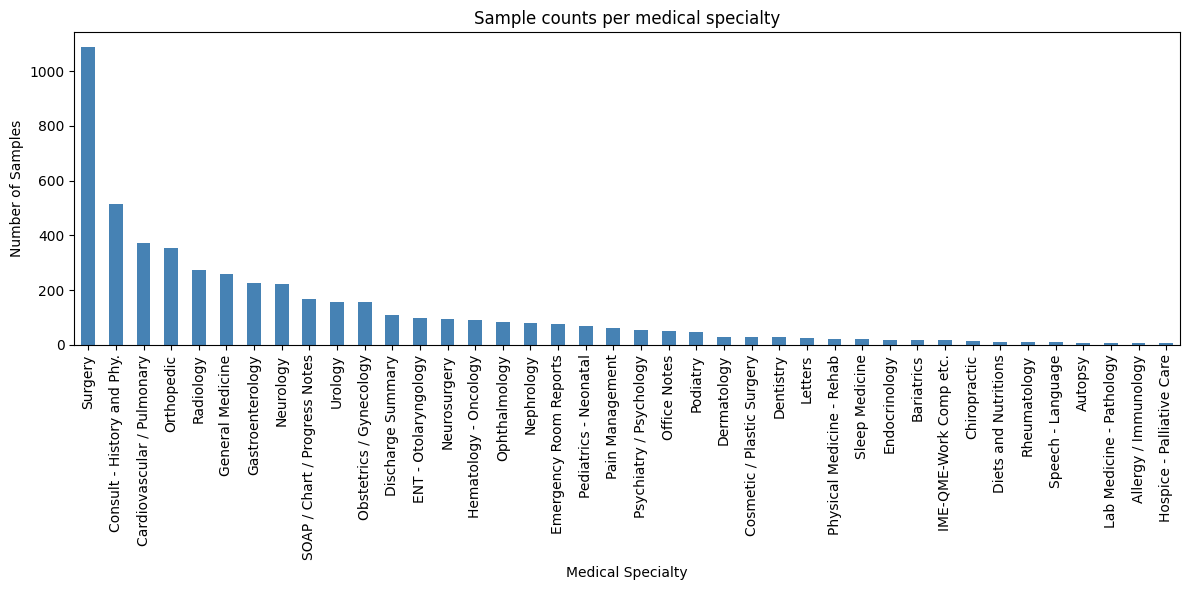

In [7]:

# --- 1. Basic info ---
print(f"Total samples: {len(df)}")
print(f"Unique labels: {df['label'].nunique()}")

# Count per class
label_counts = df['label'].value_counts()
print("\nSamples per class:")
print(label_counts)

# Check balance
print("\nDataset balance:")
print((label_counts / len(df) * 100).round(2))


plot_class_distribution(label_counts)


In [8]:
# --- 2. Text length statistics ---
df['length'] = df['text'].apply(lambda x: len(str(x).split()))

print("\nText length statistics:")
print(f"Min: {df['length'].min()}")
print(f"Avg: {df['length'].mean():.2f}")
print(f"Max: {df['length'].max()}")



Text length statistics:
Min: 1
Avg: 465.45
Max: 3029


In [9]:
# number of examples per class (adjust if needed)
examples_per_class = 3

# loop over each unique label
for label_name in sorted(df['label'].dropna().unique()):
    print(f"\n{'='*20} {label_name} {'='*20}")
    subset = df[df['label'] == label_name]
    
    # sample up to 'examples_per_class' texts from this class
    sample_texts = subset['text'].sample(min(len(subset), examples_per_class), random_state=42)
    
    for i, text in enumerate(sample_texts, start=1):
        # shorten text and replace newlines for readability
        preview = str(text).replace('\n', ' ')[:400]
        print(f"\nExample {i}:\n{preview} ...")




====================  Allergy / Immunology ====================

Example 1:
HISTORY:,  I had the pleasure of meeting and evaluating the patient referred today for evaluation and treatment of chronic sinusitis.  As you are well aware, she is a pleasant 50-year-old female who states she started having severe sinusitis about two to three months ago with facial discomfort, nasal congestion, eye pain, and postnasal drip symptoms.  She states she really has sinus problems, but  ...

Example 2:
SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not ...

Example 3:
HISTORY: , A 34-year-old male presents today self-referred at the recommendation of Emerg

### **Several characteristics of the dataset**:

The **highly imbalanced** dataset contains diverse clinical reports with structured templates and domain-specific terminology.  
The preprocessing pipeline should be designed to balance **noise reduction** with preservation of **clinically informative details**.

- **Preserve short clinical abbreviations** (e.g., *BP, HR, CT, MRI, COPD, MI*) that are semantically rich.  
  → Avoid aggressive short-token filtering to retain diagnostic and procedural meaning.

- **Retain quantitative expressions and measurements** (e.g.,  *L4–L5 disc*).  
  → Numeric tokens may need to be kept as they often indicate dosage, anatomical levels, or severity.

- **Remove repetitive clinical boilerplate** (e.g., *HISTORY*, *PROCEDURE*).  
  → An extended MEDICAL_STOPWORDS list should be there to filter non-discriminative template headers or any phrases common to all specialties.

- **Normalize medical vocabulary through lemmatization.**  
  → Lemmatization should be applied to improve TF-IDF consistency.

- **Handle mixed structured and free-text content.**  
  → Apply lowercasing and symbol cleaning, while preserving key medical units, abbreviations, and bigrams for semantic clustering.

Overall, the preprocessing in next step should aim to **reduce template redundancy** while **preserving abbreviations, measurements, and procedural terms** that define specialty-specific patterns.  



## Part 2 Establish a structured and flexible (configurable) processing pipeline 
with steps for reading documents from file tokenizing normalizing (lowercase, lemmatize/stem, …) filtering (stop words, …)
Use the script clustering.py as a template for clustering your text

In [10]:
# from utils import   plot_crosstab, plot_cluster_sizes, top_terms_per_cluster, plot_two_metrics
from preprocessing import preprocess_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from sklearn.metrics import ( silhouette_score, 
                              homogeneity_completeness_v_measure, 
                              adjusted_rand_score, )






In [11]:
# -------------------------------------
# 3. Preprocessing
# -------------------------------------
from preprocessing import preprocess_text

# Three configs
CONFIG_NONE = {
    "enable": False
}

CONFIG_MINIMAL = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": False,
    "remove_numbers": False,
    "keep_short_tokens": True,
    "remove_medical_boilerplate": False,
}

CONFIG_MEDIUM = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": True,
    "remove_numbers": False,
    "keep_short_tokens": True,
    "remove_medical_boilerplate": False,
}


CONFIG_MEDIUM2 = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": True,
    "remove_numbers": False,
    "keep_short_tokens": True,
    "remove_medical_boilerplate": True,
}

CONFIG_FULL = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": True,
    "remove_numbers": True,
    "keep_short_tokens": True,
    "remove_medical_boilerplate": True,
}


# Apply preprocessing

# df = df.head(100) # reduce the sample size to speed up for trials

df["text_none"] = df["text"].apply(lambda t: preprocess_text(t, **CONFIG_NONE))
df["text_min"]  = df["text"].apply(lambda t: preprocess_text(t, **CONFIG_MINIMAL))
df["text_med"]  = df["text"].apply(lambda t: preprocess_text(t, **CONFIG_MEDIUM))
df["text_med2"]  = df["text"].apply(lambda t: preprocess_text(t, **CONFIG_MEDIUM2))
df["text_full"] = df["text"].apply(lambda t: preprocess_text(t, **CONFIG_FULL))

In [12]:
# -------------------------------------
# 4. Vectorization
# -------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorize(series):
    vec = TfidfVectorizer(stop_words="english", ngram_range=(1,2), min_df=2)
    X = vec.fit_transform(series)
    return X, vec

X_none,  vec_none  = tfidf_vectorize(df["text_none"])
X_min,   vec_min   = tfidf_vectorize(df["text_min"])
X_med,   vec_med   = tfidf_vectorize(df["text_med"])
X_med2,   vec_med2   = tfidf_vectorize(df["text_med2"])
X_full,  vec_full  = tfidf_vectorize(df["text_full"])



In [13]:
# -------------------------------------
# 5. KMeans clustering and evaluation
# -------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, adjusted_rand_score

K_true = df["label"].nunique()
interval = 10
Ks = [K_true - interval, K_true, K_true + interval]

def run_kmeans_experiment(X):
    results = []
    for K in Ks:
        km = KMeans(n_clusters=K, n_init=10, random_state=42)
        labels = km.fit_predict(X)

        sil = silhouette_score(X, labels)
        h, c, v = homogeneity_completeness_v_measure(df["label"], labels)
        ari = adjusted_rand_score(df["label"], labels)

        results.append({
            "K": K,
            "silhouette": sil,
            "homogeneity": h,
            "completeness": c,
            "v_measure": v,
            "ARI": ari
        })
        
        # save K = true label count 
        if K == K_true:
            df[f"cluster"] = labels

    return pd.DataFrame(results)

res_none = run_kmeans_experiment(X_none)
res_min  = run_kmeans_experiment(X_min)
res_med  = run_kmeans_experiment(X_med)
res_full = run_kmeans_experiment(X_full)
res_med2 = run_kmeans_experiment(X_med2)  # This config's clustering is saved in df, overwriting previous 
  

res_none["config"] = "NONE"
res_min["config"]  = "MINIMAL"
res_med["config"]  = "MEDIUM"
res_med2["config"]  = "MEDIUM2"
res_full["config"] = "FULL"

results_all = pd.concat([res_none, res_min, res_med, res_med2, res_full], ignore_index=True)
results_all


,K,silhouette,homogeneity,completeness,v_measure,ARI,config
0,30,0.018913,0.309757,0.297302,0.303402,0.059599,NONE
1,40,0.023536,0.344785,0.298358,0.319896,0.065663,NONE
2,50,0.027496,0.376971,0.307494,0.338707,0.058095,NONE
3,30,0.020645,0.340272,0.321251,0.330488,0.069637,MINIMAL
4,40,0.024233,0.357029,0.313415,0.333803,0.071572,MINIMAL
5,50,0.028819,0.363062,0.300763,0.328989,0.048116,MINIMAL
6,30,0.021106,0.323234,0.305121,0.313917,0.068332,MEDIUM
7,40,0.024259,0.356653,0.312651,0.333206,0.071427,MEDIUM
8,50,0.027879,0.365035,0.305792,0.332797,0.052511,MEDIUM
9,30,0.021203,0.315171,0.308534,0.311817,0.055689,MEDIUM2


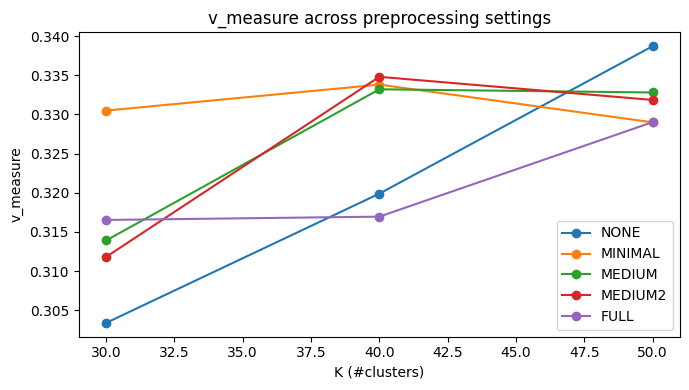

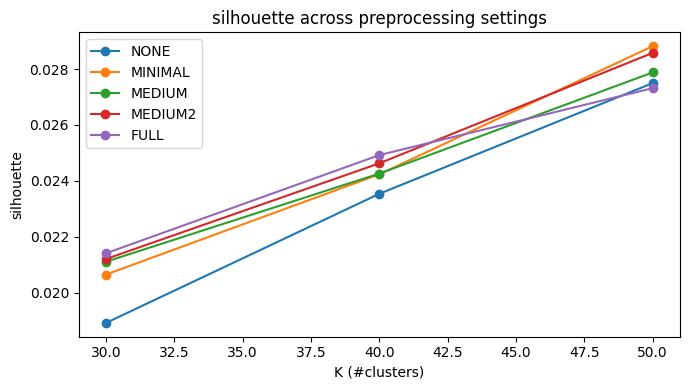

In [14]:
# -------------------------------------
# 6. Metric comparison plot
# -------------------------------------
import matplotlib.pyplot as plt

def plot_metric(results_all, metric="v_measure"):
    plt.figure(figsize=(7,4))
    
    for cfg in results_all["config"].unique():
        subset = results_all[results_all["config"] == cfg]
        plt.plot(subset["K"], subset[metric], marker="o", label=cfg)
    
    plt.title(f"{metric} across preprocessing settings")
    plt.xlabel("K (#clusters)")
    plt.ylabel(metric)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example
plot_metric(results_all, "v_measure")
plot_metric(results_all, "silhouette")


#### **6.  Metric comparison**
- Minimal denoising including "**lowercase, lemmatize and keep_short_tokens**" improved V-measure from no preprocessing.

- Removing **stopwords** and **medical boilerplate** slightly improved geometric separation (higher silouette), meaning clusters are tighter inside and farther apart from each other, compared to minimal or no preprocessing.

- However, removing **numerical tokens** (comparing FULL and MEDIUM2) reduced performance according to V-measure, suggesting such information is semantically meaningful in clinical text.

- Overall, the **MEDIUM2** configuration ("enable": True, "lowercase": True, "lemmatize": True, "remove_stopwords": True, "remove_numbers": False,  "keep_short_tokens": True, "remove_medical_boilerplate": True,) achieved the best balance between interpretability and clustering quality.

In [15]:
# -------------------------------------
# 7. Top terms per cluster
# -------------------------------------
from utils import top_terms_per_cluster

# top_terms = top_terms_per_cluster(X_full, df["cluster"], vec_full, n_terms=10)

top_terms = top_terms_per_cluster(X_med2, df["cluster"], vec_med2, n_terms=10)
top_terms


{0: array(['weight', 'sugar', 'carbohydrate', 'calorie', 'food',
        'blood sugar', 'meal', 'pound', 'eat', 'diet'], dtype=object),
 1: array(['place', 'wound', 'catheter', 'diagnosis', 'skin', 'tumor',
        'remove', 'fracture', 'close', 'tissue'], dtype=object),
 2: array(['carotid', 'carotid artery', 'artery', 'internal carotid',
        'internal', 'common carotid', 'common', 'external carotid',
        'cerebral', 'stenosis'], dtype=object),
 3: array(['mr', 'axis', 'mr abc', 'state', 'abc', 'time', 'pain',
        'medication', 'xyz', 'psychiatric'], dtype=object),
 4: array(['coronary', 'artery', 'coronary artery', 'catheter', 'circumflex',
        'leave', 'stenosis', 'branch', 'french', 'vessel'], dtype=object),
 5: array(['foot', 'metatarsal', 'tendon', 'plantar', 'phalanx', 'osteotomy',
        'fifth', 'ankle', 'bone', 'joint'], dtype=object),
 6: array(['colon', 'polyp', 'colonoscopy', 'cecum', 'rectum', 'sigmoid',
        'colonoscope', 'hemorrhoid', 'sigmoid colon

#### **7. Top Terms Interpretation**

Some top contributing tokens are relevant to a specific class.

For example: 

Cluster 1: wound, tissue, fracture, tumor → Surgery 
Cluster 5: foot, tendon, osteotomy → Podiatry 
Cluster 6: colon, polyp, colonoscopy → Gastroenterology


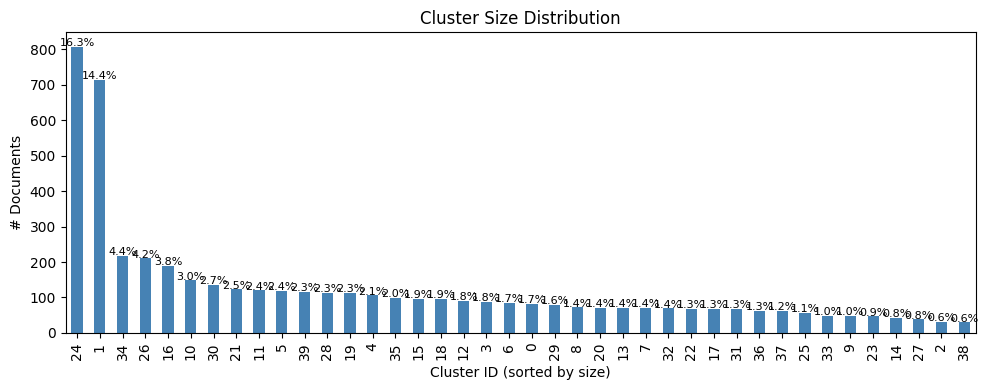

In [16]:
# -------------------------------------
# 8. Cluster size distribution
# -------------------------------------
from utils import plot_cluster_sizes
plot_cluster_sizes(df)


#### **8. Clustering Sizes Analysis**

- The dataset is **highly imbalanced**, with a few specialties like "Surgery" and "Consult – History and Phy." dominating the samples, see statistics in **part 1**.

- The clustering results mirror this imbalance — a few large clusters capture most documents, while many small clusters contain very few.

- This suggests that the clustering may reflect the overall data distribution but lacks fine-grained separation among smaller medical specialties.

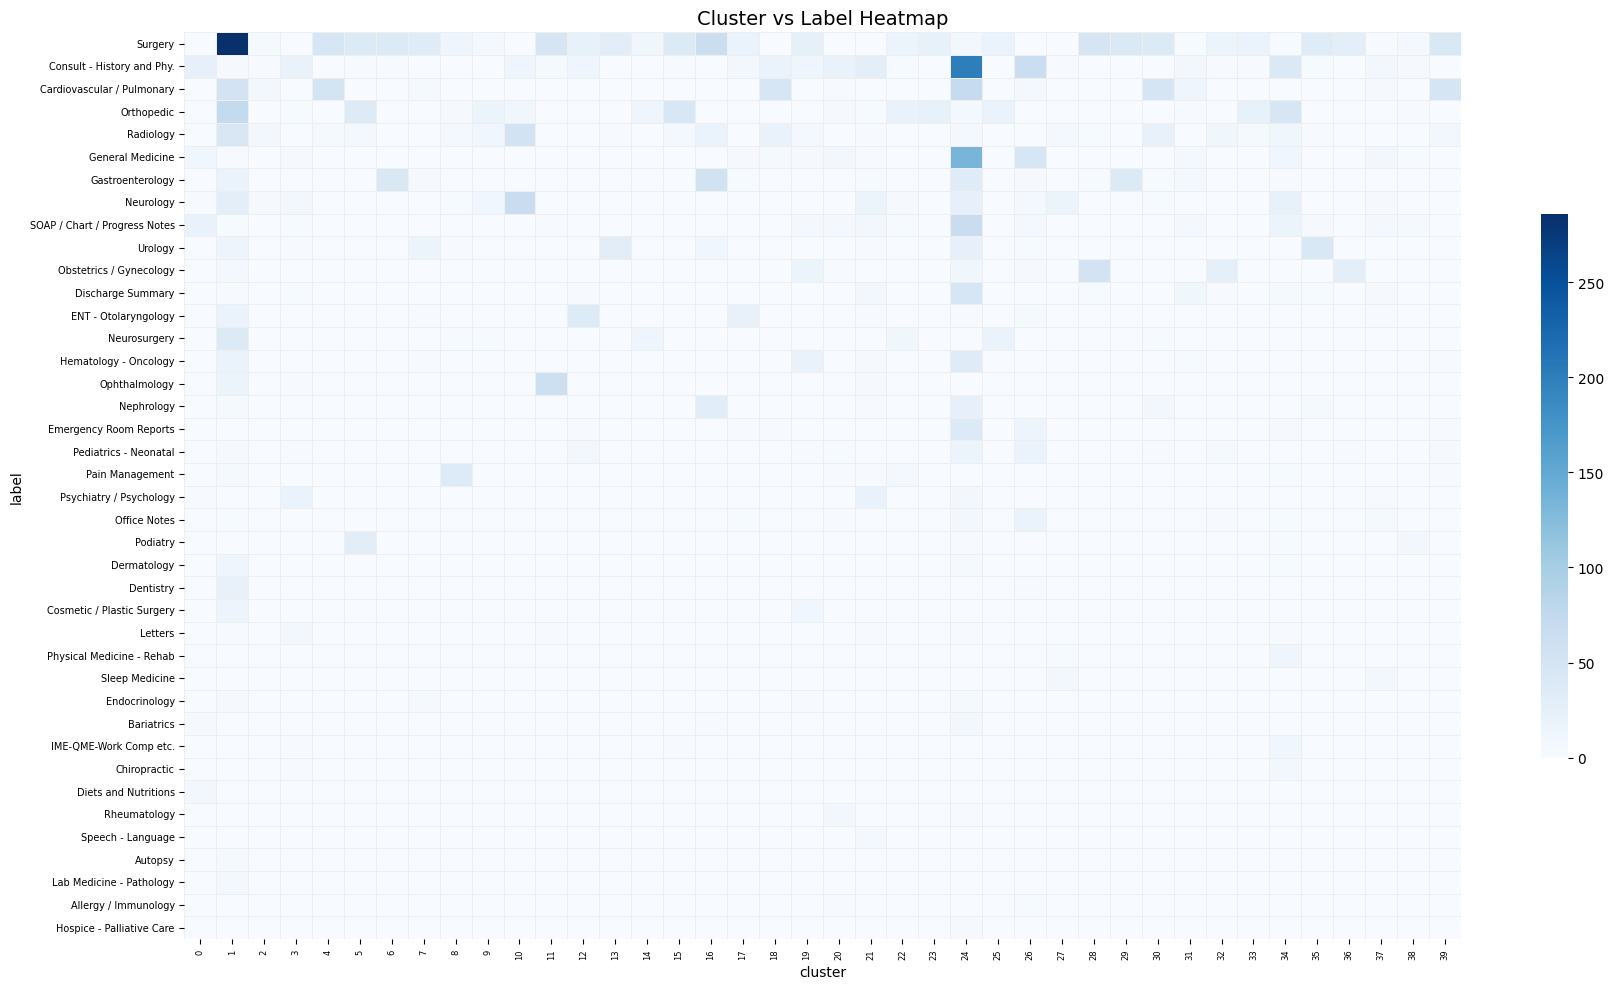

In [17]:
# -------------------------------------
# 9. Crosstab heatmap
# -------------------------------------
from utils import plot_crosstab
plot_crosstab(df.rename(columns={"cluster_full": "cluster"}))


#### **9. Compare Label vs. Cluster**

From this heatmap, we can make a few clear observations:

- Cluster–label alignment is weak overall, with most labels spreading across many clusters and vice versa.

- A few strong alignments stand out — for example, Surgery aligns heavily with a single dominant cluster (around cluster 0), and Consult – History and Phy. has another distinct concentration (around cluster 24).

- Row-wise observation checks how each label maps to clusters. Good examples are: 
    -  **Ophthalmology**, has only **cluster 11** dominant, where the top terms are 'eye', 'chamber', 'lens', 'cataract', 'intraocular', 'speculum', etc.
    -  **Podiatry**, has only **cluster 5** dominant, where the top terms are 'foot', 'metatarsal', 'tendon', 'plantar','ankle', etc. 
    -  **ENT**, has only **cluster 12** dominant, where the top terms are 'ear', 'tube', 'otitis', 'nasal', 'myringotomy', 'middle ear', 'tympanic' etc.

In short, the model differentiates major document types but still mixes many similar or overlapping specialties.

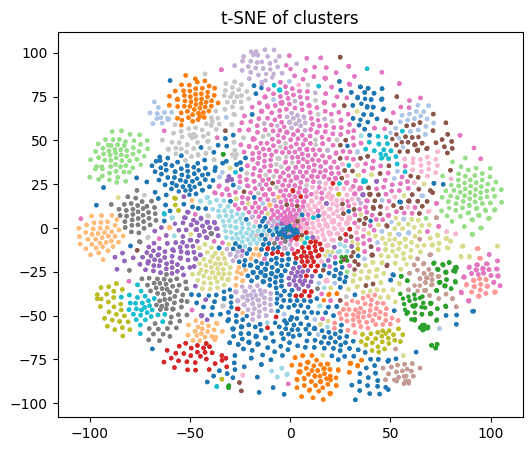

In [18]:
# -------------------------------------
# 10. t-SNE visualization
# -------------------------------------
from utils import plot_tsne
plot_tsne(X_med2, df["cluster"])

#### **10. 2D Visualization**

- This t-SNE plot shows several compact, well-separated clusters alongside a large mixed central region. The tight color groups suggest that some document types (e.g., specific procedures) are clearly distinguishable.

- However, the overlapping center indicates that many notes share common vocabulary and are harder to separate.

- Overall, the clustering captures partial thematic structure but not full category separation — consistent with the silhouette score.

**Data cleaning pipeline**

1. Stop word removal (*use identified stopwords in custom_stopwords.csv)
2. Tokenization
3. Normalization (lemmatize)
4. Filter (stopwords)

In [ ]:
for t in df['text']:
    if 'NECK' in t:
        print(t)

### 1. Remove custom stopwords from dataset

Before tokenization.
Use regex patterns to remove the identified stopwords.

In [97]:
import re

if custom_stopwords is None:
    custom_stopwords = pd.read_csv('custom_stopwords.csv', sep=',')
pattern = r"\b(" + "|".join(map(re.escape, custom_stopwords)) + r")\b"

df["clean_text"] = df["text"].str.replace(pattern, "", regex=True)
df["text"] = df["clean_text"]
df = df.drop(columns=['clean_text'])

### 2. Tokenization

In [99]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

docs = []
texts = df['text']
for doc in tokenizer.pipe(texts, batch_size=50):
    docs.append(doc)
